### Importando las librerias

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

### Importando los datasets

In [2]:
df_train_values = pd.read_csv('../datasets/train_values.csv')
df_train_labels = pd.read_csv('../datasets/train_labels.csv')

### Daños por piso

#### hago el filtro de los datos

In [3]:
df_train_values_filtered = df_train_values.loc[:, ['building_id', 'count_floors_pre_eq']]
df_train_values_filtered

,building_id,count_floors_pre_eq
0,802906,2
1,28830,2
2,94947,2
3,590882,2
4,201944,3
...,...,...
260596,688636,1
260597,669485,2
260598,602512,3
260599,151409,2


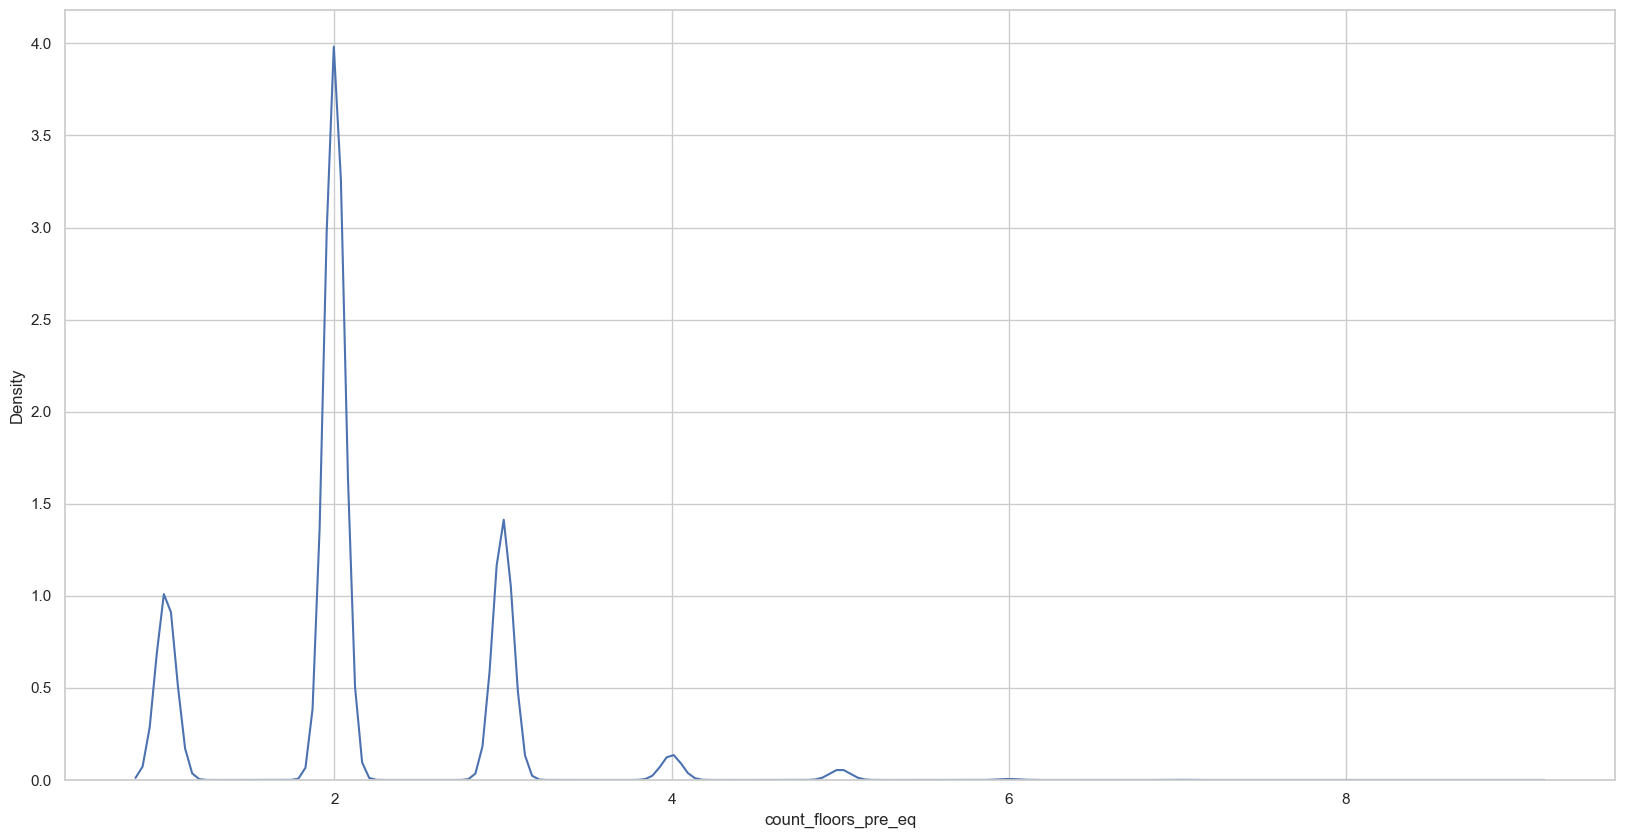

In [4]:
g = sns.distplot(df_train_values_filtered["count_floors_pre_eq"], hist=False)

#### Calculo la cantidad de edificios por piso

In [5]:
total_buildings_by_floor = df_train_values_filtered\
    .groupby(['count_floors_pre_eq'])\
    .count()\
    .reset_index()\
    .rename(columns={'building_id':'total_buildings_by_floor'})
total_buildings_by_floor

,count_floors_pre_eq,total_buildings_by_floor
0,1,40441
1,2,156623
2,3,55617
3,4,5424
4,5,2246
5,6,209
6,7,39
7,8,1
8,9,1


#### Hago el merge de los datos

In [6]:
df_floors_and_damage = df_train_labels.merge(df_train_values_filtered).merge(total_buildings_by_floor)
df_floors_and_damage

,building_id,damage_grade,count_floors_pre_eq,total_buildings_by_floor
0,802906,3,2,156623
1,28830,2,2,156623
2,94947,3,2,156623
3,590882,2,2,156623
4,333020,2,2,156623
...,...,...,...,...
260596,25158,2,7,39
260597,163425,2,7,39
260598,972992,2,7,39
260599,361707,2,8,1


#### Hago el calculo del porcentaje de los distintos daños en una misma cantidad de pisos

In [7]:
df_floors_and_damage_with_percentage = df_floors_and_damage\
    .groupby(['count_floors_pre_eq', 'damage_grade', 'total_buildings_by_floor'])\
    .count()\
    .rename(columns = { 'building_id': 'total_buildings_by_floor_and_damage' })\
    .reset_index()
df_floors_and_damage_with_percentage['percentage'] = (df_floors_and_damage_with_percentage['total_buildings_by_floor_and_damage'] * 100) / df_floors_and_damage_with_percentage['total_buildings_by_floor']
df_floors_and_damage_with_percentage

,count_floors_pre_eq,damage_grade,total_buildings_by_floor,total_buildings_by_floor_and_damage,percentage
0,1,1,40441,8969,22.18
1,1,2,40441,20798,51.43
2,1,3,40441,10674,26.39
3,2,1,156623,12593,8.04
4,2,2,156623,93968,60.00
5,2,3,156623,50062,31.96
6,3,1,55617,2537,4.56
7,3,2,55617,28479,51.21
8,3,3,55617,24601,44.23
9,4,1,5424,707,13.03


De esto podemos sacar diferentes hipótesis, sin tener conocimiento de otro tipo de variables. 

Por ejemplo podemos observar que en general los mayores daños son de nivel 2. Pero podemos observar en el cuadro de abajo como si hubiese un punto de inflexión en el daño 3 a partir de los edificios de 3 pisos, donde se produce el porcentaje de daño mas elevado. 

In [8]:
df_floors_and_damage_to_plot = df_floors_and_damage_with_percentage\
    [['count_floors_pre_eq', 'damage_grade', 'percentage']]\
    .pivot(index='count_floors_pre_eq', columns='damage_grade',values='percentage')

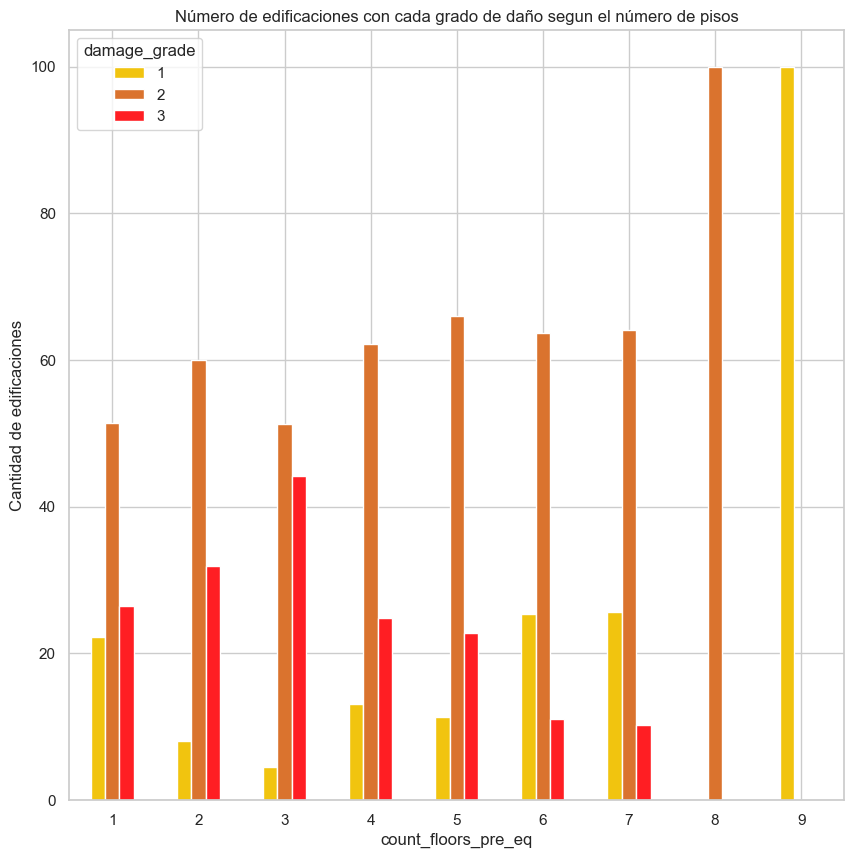

In [9]:
df_floors_and_damage_to_plot.plot(kind='bar',figsize=(10,10),\
                                    rot=0,title='Número de edificaciones con cada grado de daño segun el número de pisos',
                                 color={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' })
ax=plt.gca()
ax.set_xlabel('count_floors_pre_eq')
ax.set_ylabel('Cantidad de edificaciones');

In [10]:
df_floors_and_damage_with_percentage.loc[df_floors_and_damage_with_percentage['damage_grade'] == 3, :]

,count_floors_pre_eq,damage_grade,total_buildings_by_floor,total_buildings_by_floor_and_damage,percentage
2,1,3,40441,10674,26.39
5,2,3,156623,50062,31.96
8,3,3,55617,24601,44.23
11,4,3,5424,1343,24.76
14,5,3,2246,511,22.75
17,6,3,209,23,11.00
20,7,3,39,4,10.26


Esto puede deberse a diferentes motivos, uno de ellos podría ser que la zona geográfica donde predominan los edificios de este tipo fue mas golpeada por la catástrofe o que los materiales de construcción en este tipo de viviendas no son tan resistentes.

HACER ANALISIS CONTINUANDO ESTE PUNTO

Otro dato interesante podría ser la falta de edificios mayores a 7 pisos con daño 3, ningún edificio de 8 o 9 pisos fueron dañados en estas condiciones. Podría ser también por construcciones mas robustas, construcciones modernas o estar en una zona alejada al terremoto.